# Task # a)

In [2]:
import csv

class DeviceInfoSystem:
    def __init__(self, csv_file_path):
        self.data = self.load_data(csv_file_path)

    def load_data(self, file_path):
        with open(file_path, 'r') as csv_file:
            csv_reader = csv.DictReader(csv_file)
            data = [row for row in csv_reader]
        return data

    def retrieve_device_info_by_oem_id(self, oem_id):
        result = []
        for row in self.data:
            if row['oem_id'] == oem_id:
                result.append({
                    'model_name': row['model'],
                    'manufacturer': row['manufacturer'],
                    'weight': row['weight_gram'],
                    'price': row['price'],
                    'price_currency': row['price_currency']
                })
        return result

    def retrieve_device_info_by_codename(self, codename):
        result = []
        for row in self.data:
            if row['codename'] == codename:
                result.append({
                    'brand': row['brand'],
                    'model_name': row['model'],
                    'ram_capacity': row['ram_capacity'],
                    'market_regions': row['market_regions'],
                    'info_added_date': row['info_added_date']
                })
        return result

    def retrieve_device_info_by_ram_capacity(self, ram_capacity):
        result = []
        for row in self.data:
            if row['ram_capacity'] == ram_capacity:
                result.append({
                    'oem_id': row['oem_id'],
                    'released_date': row['released_date'],
                    'announced_date': row['announced_date'],
                    'dimensions': row['dimensions'],
                    'device_category': row['device_category']
                })
        return result

    def retrieve_custom_info(self):
        # Example: Retrieve information where RAM capacity is greater than 8GB
        result = []
        for row in self.data:
            if int(row['ram_capacity']) > 8:
                result.append({
                    'oem_id': row['oem_id'],
                    'model_name': row['model'],
                    'display_type': row['display_type']

                })
        return result

# Input         Usage
csv_file_path = 'device_features.csv'
system = DeviceInfoSystem(csv_file_path)

# Input 1
result_a1 = system.retrieve_device_info_by_oem_id('A135UZKAUSC')
print("Result a1:", result_a1)

# Input 2
result_a2 = system.retrieve_device_info_by_codename('Motorola Penang')
print("Result a2:", result_a2)

# Input 3
result_a3 = system.retrieve_device_info_by_ram_capacity('12')
print("Result a3:", result_a3)

# Input 4
result_a4 = system.retrieve_custom_info()
print("Result a4:", result_a4)


Result a1: [{'model_name': 'SM-A135U Galaxy A13 2022 Standard Edition TD-LTE US 32GB / SM-A135R4', 'manufacturer': 'Samsung Electronics', 'weight': '195', 'price': '199', 'price_currency': 'USD'}]
Result a2: [{'brand': 'Motorola', 'model_name': 'Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2335-5', 'ram_capacity': '8', 'market_regions': 'Asia', 'info_added_date': '23-07-23 19:14'}, {'brand': 'Motorola', 'model_name': 'Moto G53 5G 2022 Premium Edition TD-LTE LATAM 128GB XT2335-1', 'ram_capacity': '6', 'market_regions': 'North America,South America', 'info_added_date': '23-07-23 15:52'}, {'brand': 'Motorola', 'model_name': 'Moto G53 5G 2022 Standard Edition Dual SIM TD-LTE LATAM 128GB XT2335-1', 'ram_capacity': '4', 'market_regions': 'Central America,South America', 'info_added_date': '23-07-23 15:13'}, {'brand': 'Motorola', 'model_name': 'Moto G53 5G 2022 Standard Edition Global Dual SIM TD-LTE 128GB XT2335-2', 'ram_capacity': '4', 'market_regions': 'Asia,Australia,Eastern Europe,Europe

# Task # b)

In [2]:

import pandas as pd
import csv

class DeviceInfoSystem:
    def __init__(self, csv_file_path):
        self.data = self.load_data(csv_file_path)

    def load_data(self, file_path):
        data = pd.read_csv(file_path)
        return data

    def retrieve_device_info_by_oem_id(self, oem_id):
        result = self.data[self.data['oem_id'] == oem_id][['model', 'manufacturer', 'weight_gram', 'price', 'price_currency']]
        return result.to_dict(orient='records')

    def retrieve_device_info_by_codename(self, codename):
        result = self.data[self.data['codename'] == codename][['brand', 'model', 'ram_capacity', 'market_regions', 'info_added_date']]
        return result.to_dict(orient='records')

    def retrieve_device_info_by_ram_capacity(self, ram_capacity):
        result = self.data[self.data['ram_capacity'] == ram_capacity][['oem_id', 'released_date', 'announced_date', 'dimensions', 'device_category']]
        return result.to_dict(orient='records')

    def retrieve_custom_info(self):
        # Example: Retrieve information where RAM capacity is greater than 8GB
        result = self.data[self.data['ram_capacity'] > 8][['oem_id', 'model', 'display_type']]
        return result.to_dict(orient='records')

    def top_regions_for_brand(self, brand):
        top_regions = self.data[self.data['brand'] == brand].groupby('market_regions').size().nlargest(5)
        return top_regions.to_dict()

    def average_price_by_brand(self, brand):
        avg_price = self.data[self.data['brand'] == brand].groupby('price_currency')['price'].mean()
        return avg_price.to_dict()

    def average_mass_by_manufacturer(self):
        avg_mass = self.data.groupby('manufacturer')['weight_gram'].mean()
        return avg_mass.to_dict()

    def custom_analysis(self):
        # Example: Calculate the percentage of devices with a high pixel density
        high_pixel_density_percentage = (self.data[self.data['pixel_density'] > 400].shape[0] / self.data.shape[0]) * 100
        return f"Percentage of devices with high pixel density: {high_pixel_density_percentage:.2f}%"

# Input Usage
csv_file_path = 'device_features.csv'
system = DeviceInfoSystem(csv_file_path)

# Input 1
result_b1 = system.top_regions_for_brand('Xiaomi')
print("Result b1:", result_b1)

# Input 2
result_b2 = system.average_price_by_brand('Xiaomi')
print("Result b2:", result_b2)

# Input 3
result_b3 = system.average_mass_by_manufacturer()
print("Result b3:", result_b3)

# Input 4
result_b4 = system.custom_analysis()
print("Result b4:", result_b4)


Result b1: {'Asia': 41, 'Asia,Eastern Europe,Europe,Middle East,Southeast Asia,Western Europe': 4, 'Africa,Asia,Eastern Europe,Europe,Middle East,North America,Southeast Asia,Western Europe': 2, 'Asia,Southeast Asia': 2, 'Africa,Asia,Eastern Europe,Europe,Middle East,Southeast Asia,Western Europe': 1}
Result b2: {'CNY': 3699.0, 'EUR': 421.378, 'INR': 25232.333333333332, 'USD': 479.0}
Result b3: {'ASUSTeK Computer': 221.3673469387755, 'BBK Electronics': 201.0, 'FIH Precision Electronics': 203.75, 'Foxconn': 315.1479750778816, 'Hon Hai Precision': 144.0, 'LG Electronics': 204.075, 'Lenovo': 216.97590361445782, 'Luxshare iTech': 31.605, 'Microsoft': 284.0, 'Rising Stars Mobile India': 196.5, 'Samsung Electronics': 205.64403973509934, 'Sharp': 209.5, 'Shenzhen TINNO Mobile Technology': 198.84, 'Sony': 189.36363636363637, 'Wingtech Mobile': 204.5, 'Xiaomi': 190.54545454545453, 'ZTE': 195.5}
Result b4: Percentage of devices with high pixel density: 54.05%


# Task # c)

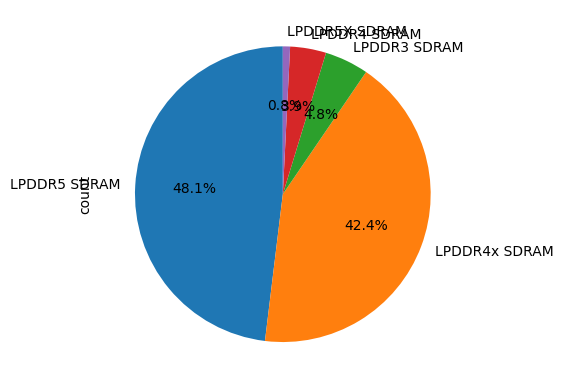

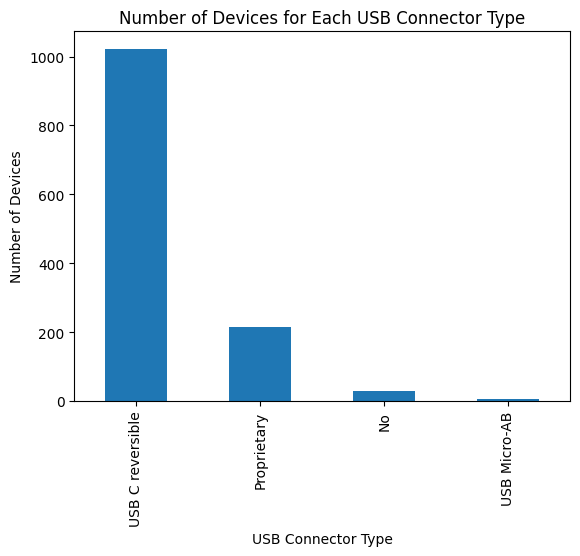

C:\Users\USER\AppData\Local\Temp\ipykernel_10372\3707475579.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['released_date'] = pd.to_datetime(self.data['released_date'])


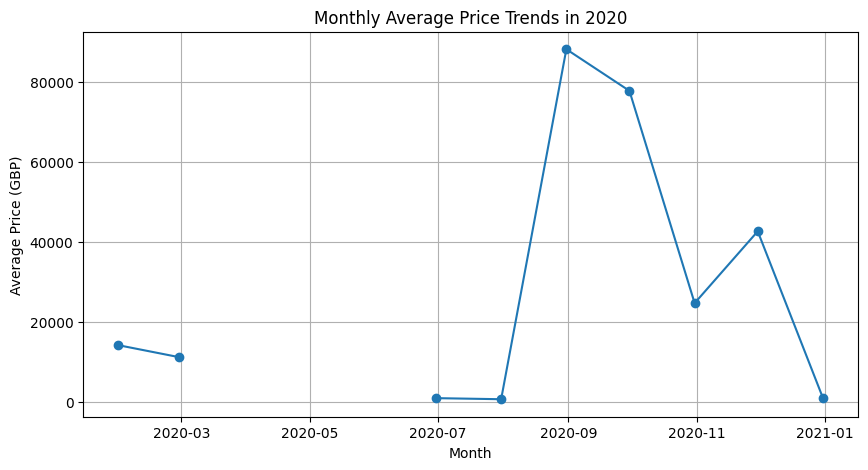

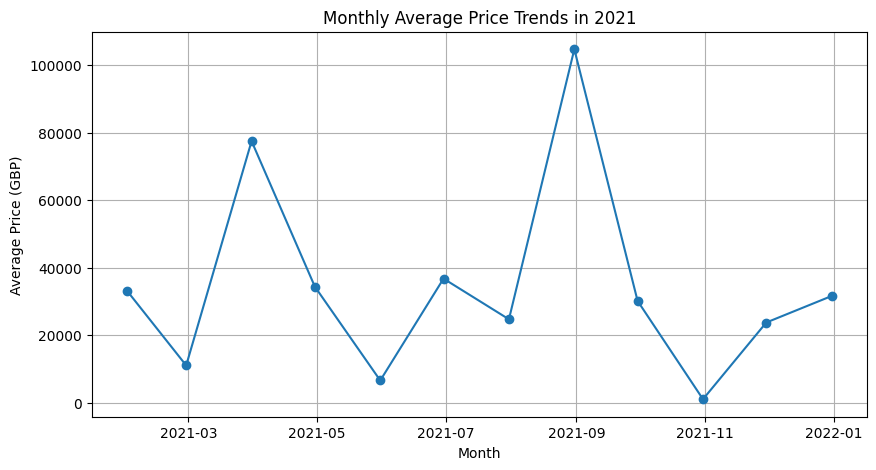

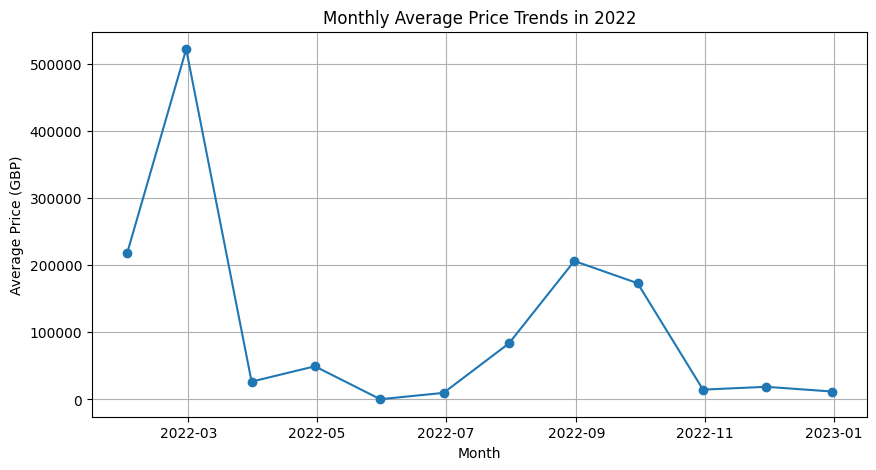

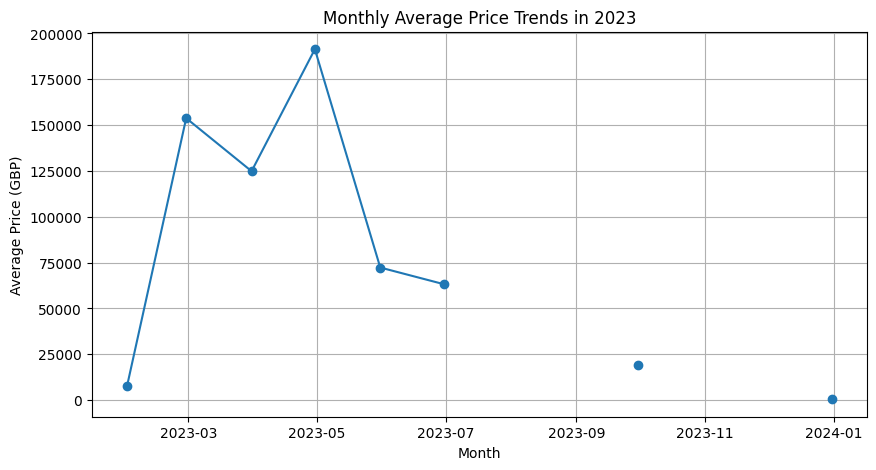

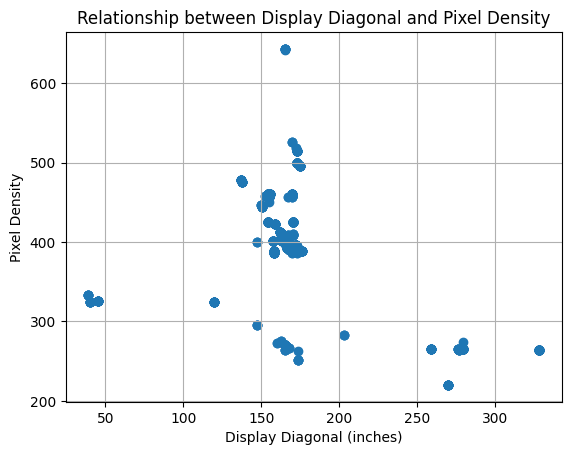

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

class DeviceInfoSystem:
    def __init__(self, csv_file_path):
        self.data = self.load_data(csv_file_path)

    def load_data(self, file_path):
        data = pd.read_csv(file_path)
        return data

    def retrieve_device_info_by_ram_type(self):
        ram_types = self.data['ram_type'].value_counts()
        return ram_types

    def devices_by_usb_connector(self):
        usb_connector_count = self.data['usb_connector'].value_counts()
        return usb_connector_count

    def monthly_average_price_trends(self):
        # Convert 'released_date' to datetime
        self.data['released_date'] = pd.to_datetime(self.data['released_date'])

        # Filter data for the years 2020 to 2023
        filtered_data = self.data[(self.data['released_date'].dt.year >= 2020) & (self.data['released_date'].dt.year <= 2023)]

        # Create separate charts for each year
        for year in range(2020, 2024):
            year_data = filtered_data[filtered_data['released_date'].dt.year == year]
            monthly_avg_prices = year_data.resample('M', on='released_date')['price'].mean()

            plt.figure(figsize=(10, 5))
            plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o')
            plt.title(f'Monthly Average Price Trends in {year}')
            plt.xlabel('Month')
            plt.ylabel('Average Price (GBP)')
            plt.grid(True)
            plt.show()

    def custom_visualization(self):
        # Example: Create a scatter plot to visualize the relationship between display diagonal and pixel density
        plt.scatter(self.data['display_diagonal'], self.data['pixel_density'])
        plt.title('Relationship between Display Diagonal and Pixel Density')
        plt.xlabel('Display Diagonal (inches)')
        plt.ylabel('Pixel Density')
        plt.grid(True)
        plt.show()

# Input Usage
csv_file_path = 'device_features.csv'
system = DeviceInfoSystem(csv_file_path)

# Input 1
result_c1 = system.retrieve_device_info_by_ram_type()
result_c1.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('')
plt.show()

# Input 2
result_c2 = system.devices_by_usb_connector()
result_c2.plot(kind='bar')
plt.title('Number of Devices for Each USB Connector Type')
plt.xlabel('USB Connector Type')
plt.ylabel('Number of Devices')
plt.show()

# Input 3
system.monthly_average_price_trends()

# Example 4
system.custom_visualization()
